In [1]:
import numpy as np
from fmskill.model import ModelResult
from fmskill.observation import PointObservation

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
fn = '../tests/testdata/Oresund2D.dfsu'
mr = ModelResult(fn)
mr.dfs

Dfsu2D
Number of elements: 3612
Number of nodes: 2046
Projection: UTM-33
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Total water depth <Water Depth> (meter)
  2:  U velocity <u velocity component> (meter per sec)
  3:  V velocity <v velocity component> (meter per sec)
  4:  Wind U velocity <Wind Velocity> (meter per sec)
  5:  Wind V velocity <Wind Velocity> (meter per sec)
  6:  Air pressure <Pressure2> (pascal)
Time: 51 steps with dt=12000.0s
      2018-03-04 00:00:00 -- 2018-03-10 22:40:00

In [4]:
fn = '../tests/testdata/smhi_2095_klagshamn.dfs0'
o1 = PointObservation(fn, x=366844.15, y=6154291.6, item=0) 
print(o1)
print(o1.n, o1.start_time)

PointObservation: smhi_2095_klagshamn, x=366844.15, y=6154291.6
50328 2015-01-01 01:00:00


In [5]:
mr.add_observation(o1, item='Surface elevation')
mr.observations

{'smhi_2095_klagshamn': PointObservation: smhi_2095_klagshamn, x=366844.15, y=6154291.6}

<AxesSubplot:>

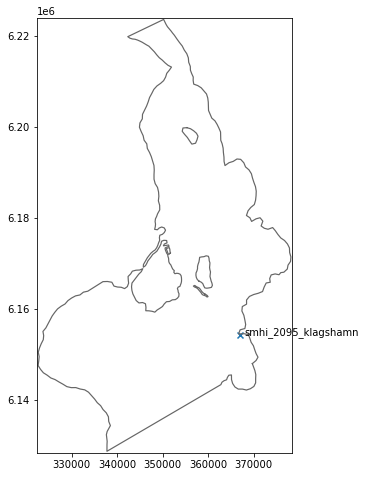

In [6]:
mr.plot_observation_positions(figsize=(8,8))

In [7]:
comparison = mr.compare_point_observation(o1, item=0)

100%|██████████| 51/51 [00:00<00:00, 2999.04it/s]


<AxesSubplot:title={'center':'smhi_2095_klagshamn'}, ylabel='Water Level [m]'>

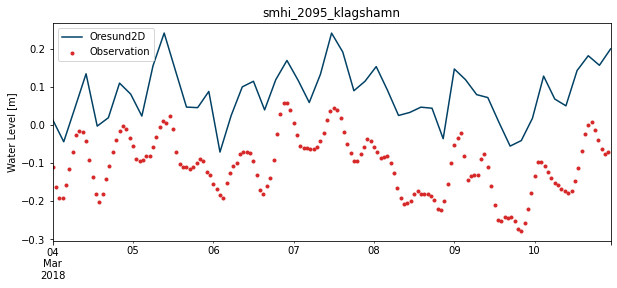

In [8]:
comparison.plot_timeseries(figsize=(10,4))

<AxesSubplot:title={'center':'smhi_2095_klagshamn'}, ylabel='Water Level [m]'>

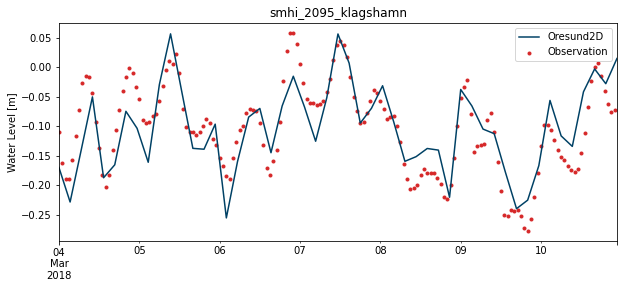

In [9]:
comparison.remove_bias()
comparison.plot_timeseries(figsize=(10,4))

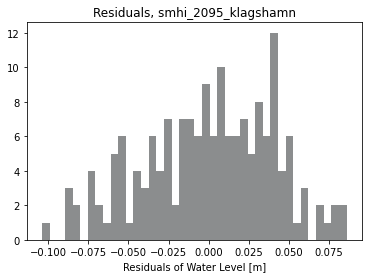

In [10]:
comparison.residual_hist(bins=40);

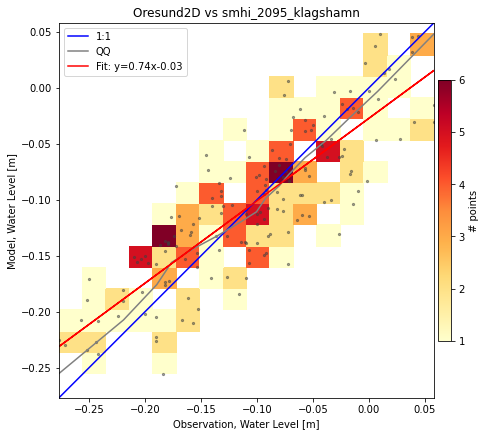

In [11]:
comparison.scatter(binsize=0.02, cmap='YlOrRd')